In [16]:
%matplotlib inline

from modsim import *

In [17]:
#simulation of freshman class only
init1 = State(s1=89, i1=1,r1=0)

init2 = State(s2=90, i2=0, r2=0)

init3 = State(s3=90, i3=0, r3=0)

init4 = State(s4=90,i4=0,r4=0)

init1, init2, init3, init4

(s1    89
 i1     1
 r1     0
 dtype: int64, s2    90
 i2     0
 r2     0
 dtype: int64, s3    90
 i3     0
 r3     0
 dtype: int64, s4    90
 i4     0
 r4     0
 dtype: int64)

In [18]:
init1 /= sum(init1)
init2 /= sum(init2)
init3 /= sum(init3)
init4 /= sum(init4)
init1, init2, init3, init4

(s1    0.988889
 i1    0.011111
 r1    0.000000
 dtype: float64, s2    1.0
 i2    0.0
 r2    0.0
 dtype: float64, s3    1.0
 i3    0.0
 r3    0.0
 dtype: float64, s4    1.0
 i4    0.0
 r4    0.0
 dtype: float64)

In [266]:
def make_system(beta1, beta2, beta3, beta4, beta5, beta6, beta7, gamma):
    """BETAS
    beta1 - within class
    beta2 - F-So
    beta3 - F-J
    beta4 - F-Se
    beta5 - So-J
    beta6 - So-Se
    beta7 - J-Se
    """

    init1 = State(s1=89, i1=1,r1=0)

    init2 = State(s2=90, i2=0, r2=0)

    init3 = State(s3=90, i3=0, r3=0)

    init4 = State(s4=90, i4=0, r4=0)
    

    init1 /= sum(init1)
    init2 /= sum(init2)
    init3 /= sum(init3)
    init4 /= sum(init4)
  
    
    t0 =0 
    t_end = 20
    
    return System(init1=init1, init2=init2, init3=init3, init4=init4, t0=t0, t_end=t_end,
                 beta1=beta1, beta2=beta2, beta3=beta3, beta4=beta4, beta5=beta5, beta6=beta6, beta7=beta7, gamma=gamma)

In [267]:
state1 = update1(init1, init2, init3, init4, system)
state2 = update2(init1, init2, init3, init4, system)
state3 = update3(init1, init2, init3, init4, system)
state4 = update4(init1, init2, init3, init4, system)

In [268]:
def update1(state1, state2, state3, state4, system):
    unpack(system)
    s1, i1, r1 = state1
    s2, i2, r2 = state2
    s3, i3, r3 = state3
    s4, i4, r4 = state4
    infected1 = beta1*s1*i1 + beta2*s1*i2 + beta3*s1*i3 + beta4*s1*i4
    recovered1 = gamma * i1
    s1 -= infected1
    i1 += infected1 - recovered1
    r1 += recovered1
    return State(S1=s1, I1=i1, R1=r1)



In [269]:
def update2(state1, state2, state3, state4, system):
    unpack(system)
    s1, i1, r1 = state1
    s2, i2, r2 = state2
    s3, i3, r3 = state3
    s4, i4, r4 = state4
    infected2 = beta1*s2*i2 + beta2*s2*i1 + beta5*s2*i3 + beta6*s2*i4
    recovered2 = gamma * i2
    s2 -= infected2
    i2 += infected2 - recovered2
    r2 += recovered2
    return State(S2=s2, I2=i2, R2=r2)

In [270]:
def update3(state1, state2, state3, state4, system):
    unpack(system)
    s1, i1, r1 = state1
    s2, i2, r2 = state2
    s3, i3, r3 = state3
    s4, i4, r4 = state4
    infected3 = beta1*s3*i3 + beta3*s3*i1 + beta5*s3*i2 + beta7*s3*i4
    recovered3 = gamma * i3
    s3 -= infected3
    i3 += infected3 - recovered3
    r3 += recovered3
    return State(S3=s3, I3=i3, R3=r3)

In [271]:
def update4(state1, state2, state3, state4, system):
    unpack(system)
    s1, i1, r1 = state1
    s2, i2, r2 = state2
    s3, i3, r3 = state3
    s4, i4, r4 = state4
    infected4 = beta1*s4*i4 + beta4*s4*i1 + beta6*s4*i2 + beta7*s4*i3
    recovered4 = gamma * i4
    s4 -= infected4
    i4 += infected4 - recovered4
    r4 += recovered4
    return State(S4=s4, I4=i4, R4=r4)

In [272]:
def run_simulation(system, update1):
    
    s1 = TimeSeries()
    s2 = TimeSeries()
    s3 = TimeSeries()
    s4 = TimeSeries()
    i1 = TimeSeries()
    i2 = TimeSeries()
    i3 = TimeSeries()
    i4 = TimeSeries()
    r1 = TimeSeries()
    r2 = TimeSeries()
    r3 = TimeSeries()
    r4 = TimeSeries()
    
    
    
    state1 = system.init1
    state2 = system.init2
    state3 = system.init3
    state4 = system.init4
    
    t0 = system.t0
    s1[t0], i1[t0], r1[t0] = state1
    s2[t0], i2[t0], r2[t0] = state2
    s3[t0], i3[t0], r3[t0] = state3
    s4[t0], i4[t0], r4[t0] = state4
    
    
    for t in linrange(system.t0, system.t_end):
        state1 = update1(state1, state2, state3, state4, system)
        s1[t+1], i1[t+1], r1[t+1] = state1
        state2 = update2(state1, state2, state3, state4, system)
        s2[t+1], i2[t+1], r2[t+1] = state2
        state3 = update3(state1, state2, state3, state4, system)
        s3[t+1], i3[t+1], r3[t+1] = state3
        state4 = update4(state1, state2, state3, state4, system)
        s4[t+1], i4[t+1], r4[t+1] = state4
        
        
    system.s1 = s1
    system.s2 = s2
    system.s3 = s3
    system.s4 = s4
    system.i1 = i1
    system.i2 = i2
    system.i3 = i3
    system.i4 = i4
    system.r1 = r1
    system.r2 = r2
    system.r3 = r3
    system.r4 = r4
    
    
    #return state1, state2, state3, state4

In [273]:
beta1 = .7
beta2 = .4
beta3 = .2
beta4 = .1
beta5 = .4
beta6 = .2
beta7 = .4
gamma = .25
system = make_system(beta1, beta2, beta3, beta4, beta5, beta6, beta7, gamma)
system

,value
init1,s1 0.988889 i1 0.011111 r1 0.000000 d...
init2,s2 1.0 i2 0.0 r2 0.0 dtype: float64
init3,s3 1.0 i3 0.0 r3 0.0 dtype: float64
init4,s4 1.0 i4 0.0 r4 0.0 dtype: float64
t0,0
t_end,20
beta1,0.7
beta2,0.4
beta3,0.2
beta4,0.1


In [274]:
run_simulation(system, update1)

In [275]:
def plot_all_results(S1, I1, R1, S2, I2, R2, S3, I3, R3, S4, I4, R4):
    plot(S1, '--', color='blue', label='Susceptible Freshmen')
    plot(S2, '--', color='green', label='Susceptible Sophomores')
    plot(S3, '--', color='red', label='Susceptible Juniors')
    plot(S4, '--', color='purple', label='Susceptible Seniors')
    
    plot(I1, '-', color='blue', label='Infected Freshmen')
    plot(I2, '-', color='green', label='Infected Sophomores')
    plot(I3, '-', color='red', label='Infected Juniors')
    plot(I4, '-', color='purple', label='Infected Seniors')
    
    plot(R1, ':', color='blue', label='Recovered Freshmen')
    plot(R2, ':', color='green', label='Recovered Sophomores')
    plot(R3, ':', color='red', label='Recovered Juniors')
    plot(R4, ':', color='purple', label='Recovered Seniors')
    
    decorate(xlabel= 'Time (Days)', ylabel='Fraction of Population')

         

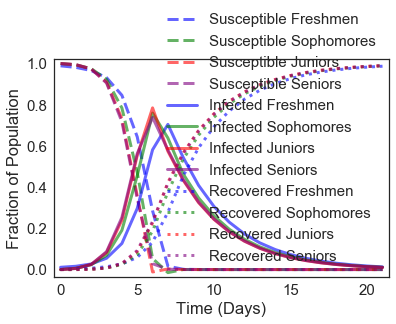

In [276]:
plot_all_results(system.s1, system.i1, system.r1, 
             system.s2, system.i2, system.r2, 
             system.s3, system.i3, system.r3, 
             system.s4, system.i4, system.r4)

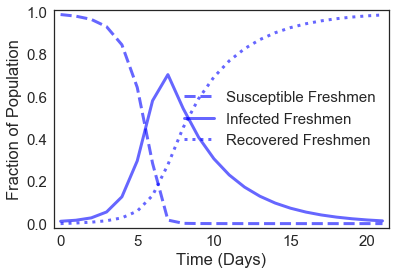

In [277]:
def plot_freshmen(S1, I1, R1):
    plot(S1, '--', color='blue', label='Susceptible Freshmen')
    plot(I1, '-', color='blue', label='Infected Freshmen')
    plot(R1, ':', color='blue', label='Recovered Freshmen')
    decorate(xlabel= 'Time (Days)', ylabel='Fraction of Population')
    
plot_freshmen(system.s1, system.i1, system.r1)


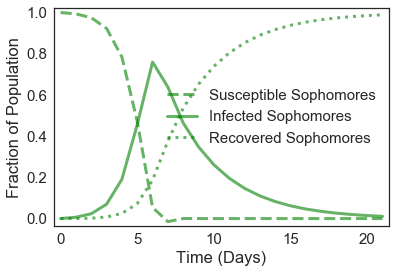

In [278]:
def plot_sophomores(S2, I2, R2):
    
    plot(S2, '--', color='green', label='Susceptible Sophomores')
    plot(I2, '-', color='green', label='Infected Sophomores')
    plot(R2, ':', color='green', label='Recovered Sophomores')
    decorate(xlabel= 'Time (Days)', ylabel='Fraction of Population')
    
plot_sophomores(system.s2, system.i2, system.r2)


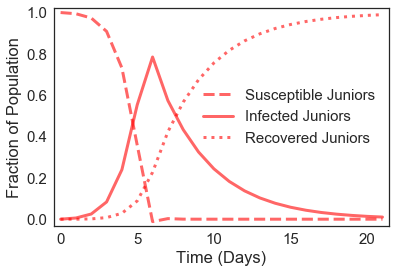

In [279]:
def plot_juniors(S3, I3, R3):
    
    plot(S3, '--', color='red', label='Susceptible Juniors')
    plot(I3, '-', color='red', label='Infected Juniors')
    plot(R3, ':', color='red', label='Recovered Juniors')
    decorate(xlabel= 'Time (Days)', ylabel='Fraction of Population')
    
plot_juniors(system.s3, system.i3, system.r3)

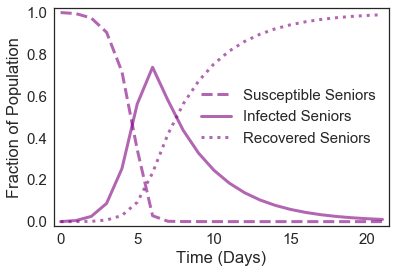

In [280]:
def plot_seniors(S4, I4, R4):
    
    plot(S4, '--', color='purple', label='Susceptible Seniors')
    plot(I4, '-', color='purple', label='Infected Seniors')
    plot(R4, ':', color='purple', label='Recovered Seniors')
    decorate(xlabel= 'Time (Days)', ylabel='Fraction of Population')
    
plot_seniors(system.s4, system.i4, system.r4)